**Описание проекта**

Перед открытием кафе, нужно провести анализ рынка на основе открытых данных о заведениях общественного питсания в Москве

# Загрузка и подготовка данных

Импортирую библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Загружаю данные. Изучаю методом head() и info()

In [2]:
rest_data = pd.read_csv('rest_data.csv')

rest_data.info()
rest_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


Таблица в пяти колонках и содержит более 15 тыс строк. Пропусков нет. Тип в колонке идентификатора и кол-ва посадочных мест целочисленный. Остальные колонки строковые значения - это информация о названии, адресе, наименовании объекта, принадлежности к сети. Изменение типа данных не потребуется. Однако нужно проверить на дубликаты


## Предобработка данных

Проверяю на дубликаты

In [3]:
rest_data.duplicated().sum()

0

Дубликатов не обнаружено

## Общий вывод по шагу 1

 - Таблица с данными не содержит пропусков и дубликатов (были применены методы head(),info(), duplicated())
 - Тип данных соответсвуют необходимым для анализа (содержит строковые и целочисленные значения)
 - Данные готовы для дальнейшего анализа

# Исследовательский анализ данных(EDA)

## График соотношения количества видов объектов

Посчитаю объекты общепита по количеству заведений

In [4]:
rest_data['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

Построю график

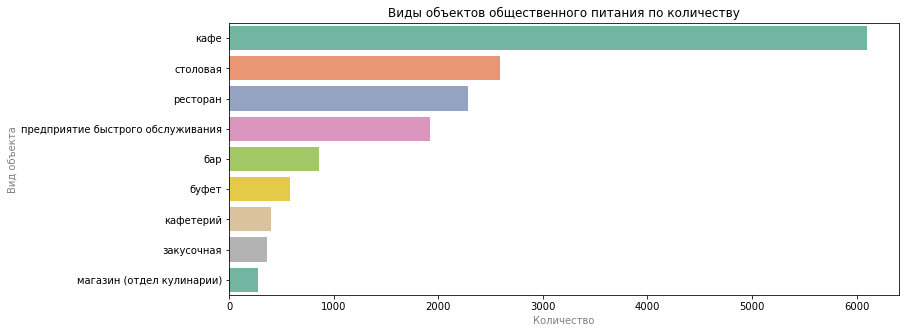

In [5]:
#сохраняем в переменной сводную таблицу с видами и количеством, сортирую значения
rd_count = rest_data.pivot_table(index='object_type', values='id',aggfunc='count').sort_values(by='id', ascending=False).reset_index()
#строим график
plt.figure(figsize=(12, 5))
sns.set_palette('Set2', 9)
ax = sns.barplot(x='id', y='object_type', data=rd_count)
ax.set_title('Виды объектов общественного питания по количеству')
ax.set_ylabel('Вид объекта', color='grey')
ax.set_xlabel('Количество', color='grey')
plt.show()

Очевидно, что лидирующее место по количеству заведений у кафе. Реже встречаются столовая, ресторан и предприятие быстрого обслуживания.

## График соотношения сетевых и несетевых объектов

Построю график столбчатая диаграмма по принадлежности к сети. Для полсчета количества обозначим аргумент estimator

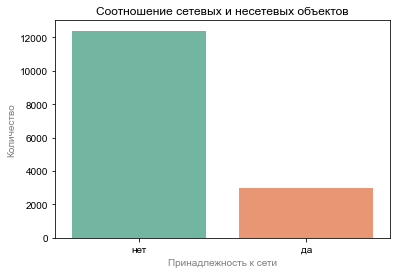

In [6]:
ax=sns.barplot(x='chain', y='id', data=rest_data, estimator=len)
sns.set_style('whitegrid')
ax.set_title('Соотношение сетевых и несетевых объектов')
ax.set_ylabel('Количество', color='grey')
ax.set_xlabel('Принадлежность к сети', color='grey')
plt.show()

Количество несетевых зведений первышает сетевые почти в четыре раза

## Характерные виды объектов с сетевым распространением

Построю график соотношения количетсва заведений с указанием доли заведений в сети. Используем параметр hue

Сначала расчитаю долю сетевых заведений по каждому типу объекта, используя сводную таблицу. Заменю значения в колоке сеть на числовые 0 и 1. Среднее арифметическое и будет доля сетевых

In [7]:
#замена значений
rest_data['chain'] = rest_data['chain'].replace('нет',0)
rest_data['chain'] = rest_data['chain'].replace('да',1)
#построение сводной таблицы с расчетом доли и общего количества заведений
net_percent = rest_data.pivot_table(index=['object_type'], values=['chain'],aggfunc=[np.mean, len])

#для наглядности переименовываю колонки
net_percent = net_percent.rename(columns={'mean':'Доля сетевых', 'len':'Количество заведений'})

#подсвечу максимальные значения
net_percent.style.format({'Доля сетевых': '{:.2f}'}).highlight_max(color='#a5cfb5', subset=['Доля сетевых','Количество заведений'])


,Доля сетевых,Количество заведений
,chain,chain
object_type,,
бар,0.043224,856
буфет,0.018803,585
закусочная,0.155556,360
кафе,0.228890,6099
кафетерий,0.130653,398
магазин (отдел кулинарии),0.285714,273
предприятие быстрого обслуживания,0.411336,1923
ресторан,0.238074,2285


Самая большая доля сетевых заведений в сегменте предприятие быстрого обслуживания. Доля сетевых в кафе - 23%

Строю график

<Figure size 1080x504 with 0 Axes>

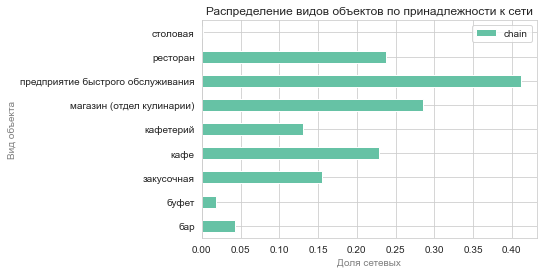

In [8]:
plt.figure(figsize=(15, 7))
net_percent.plot(kind='barh', y='Доля сетевых')
plt.title('Распределение видов объектов по принадлежности к сети')
plt.ylabel('Вид объекта', color='grey')
plt.xlabel('Доля сетевых', color='grey')
plt.show()

Из предприятий быстрого обслуживания 41% сетевые, а вот сетевых столовых практически не встречается

## Характерные особенности для сетевых заведений

Чтобы исследовать сетевые заведения, сделаю срез с помощью query


In [9]:
net_rest = rest_data.query('chain == 1')
net_rest['object_type'].value_counts()

кафе                                 1396
предприятие быстрого обслуживания     791
ресторан                              544
магазин (отдел кулинарии)              78
закусочная                             56
кафетерий                              52
бар                                    37
буфет                                  11
столовая                                3
Name: object_type, dtype: int64

Построю диаграмму рассеивания заведений по количеству посадочных мест

С помощью сводной таблицы считаю среднее количество посадочных мест по типу заведений среди сетевых

In [10]:
net_rest_pivot = net_rest.pivot_table(index='object_name', values='number', aggfunc=['mean','count']).reset_index()
net_rest_pivot['mean'] = round(net_rest_pivot['mean'],1)
net_rest_pivot.columns =['object_name','avg_number','count_number']

График

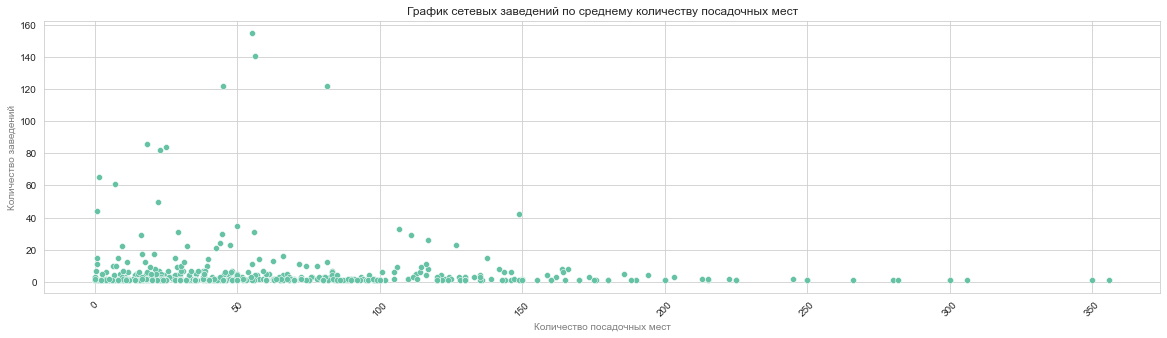

In [11]:
plt.figure(figsize=(20, 5))
ax = sns.scatterplot(data=net_rest_pivot, x='avg_number', y='count_number')
ax.set_title('График сетевых заведений по среднему количеству посадочных мест')
ax.set_ylabel('Количество заведений', color='grey')
ax.set_xlabel('Количество посадочных мест', color='grey')
plt.xticks(rotation=45)
plt.show()

Можно сделать вывод, что для сетевых заведений в целом характерно небольшое количество посадочных мест. 

## Среднее количество посадочных мест по объектам

Сначала считаю среднее количество посадочных мест по объектам

In [12]:
rest_data.groupby('object_type')['number'].mean().sort_values(ascending=False)

object_type
столовая                             130.246618
ресторан                              96.834136
буфет                                 51.129915
бар                                   43.494159
кафе                                  39.716019
предприятие быстрого обслуживания     20.552262
кафетерий                              9.123116
закусочная                             7.608333
магазин (отдел кулинарии)              5.589744
Name: number, dtype: float64

В среднем самое большое количество посадочных мест предоставляют столовые(130). Для сравнения предприятия быстрого обслуживания в среднем имеет 20 посадочных мест. 

Для наглядности построю столбчатую диаграмму. Barplot сам аггрегирует данные: по умолчанию считает среднее

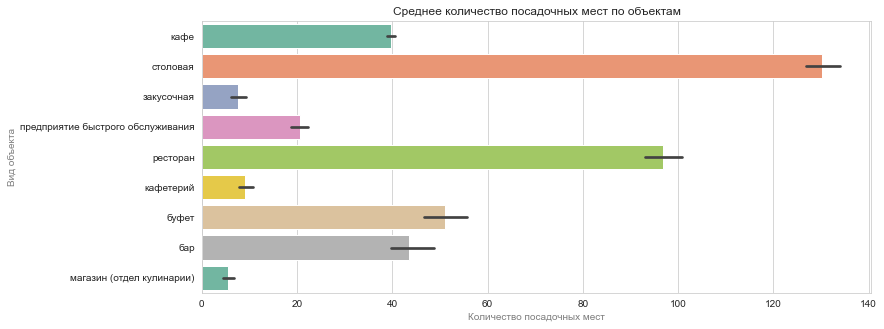

In [13]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(y='object_type', x='number', data=rest_data)
ax.set_title('Среднее количество посадочных мест по объектам')
ax.set_ylabel('Вид объекта', color='grey')
ax.set_xlabel('Количество посадочных мест', color='grey')
plt.show()

График подтверждает выводы, сделанные ранее. По среднему количеству посадочных мест лидер - столовая. Примерно на 30% меньше у ресторана. Остальные объекты имеют посадочных мест меньше, чем в столовых, в размере более чем 50%

## Топ-10 улиц по количеству объектов общепита

Выделяю улицу из адреса в отдельный столбец. Проверяю, что столбец добавился

In [14]:
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

rest_data["street"] = rest_data["address"].str.extract(str_pat)

rest_data

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,0,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,0,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,0,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,1,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,0,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,1,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,1,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,1,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,1,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


Нахожу 10-ку улиц с наибольшим количеством заведений

In [15]:
top_ten = rest_data.groupby('street')['id'].count().sort_values(ascending=False).to_frame().head(10).reset_index()
top_ten

,street,id
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,164
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


Больше всего объектов на улице Мира - 204, почти в два раза меньше на Кировоградской улице, она на 10 месте.

Пстрою график

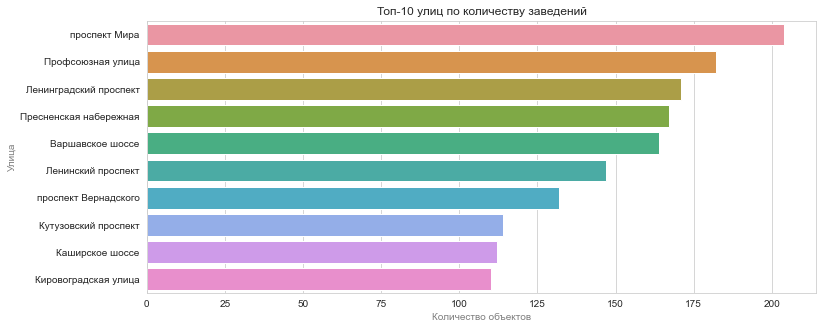

In [16]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(y='street', x='id', data=top_ten)
ax.set_title('Топ-10 улиц по количеству заведений')
ax.set_ylabel('Улица', color='grey')
ax.set_xlabel('Количество объектов', color='grey')
plt.show()

Можно сказать, что хит-парад "ровный", без резких перепадов. Есть явный лидер - проспект Мира

Для того, чтобы сказать, через какие районы проходят топ_10 улиц с наибольшим количеством заведений, введу данные из внешнего источника (в этом случае таблица улиц по районас от мосгаз). Импортирую источник через google sheets

In [17]:
from io import BytesIO
import requests
spreadsheet_id = '1mDxpD-1TlMQUwuG3POwGlimbf4NoUPfJLR3aopYa1Ks'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
streets = pd.read_csv(BytesIO(r.content))
streets

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


Объеденяю таблицы с помощью merge() 

In [18]:
top_ten_district = top_ten.merge(streets[['streetname','area']], left_on='street',right_on='streetname')
pd.set_option('max_colwidth',200)
top_ten_district.groupby('street')['area'].apply(list).reset_index()

,street,area
0,Варшавское шоссе,"[Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное, Донской район, Район Нагатино-Садовники, Нагорный район, Район Северное Бутово, Район Южное Бутово]"
1,Каширское шоссе,"[Район Москворечье-Сабурово, Район Нагатино-Садовники, Район Орехово-Борисово Южное, Район Орехово-Борисово Северное]"
2,Кировоградская улица,"[Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное]"
3,Кутузовский проспект,"[Район Дорогомилово, Район Фили-Давыдково]"
4,Ленинградский проспект,"[Район Аэропорт, Район Беговой, Хорошевский район, Район Сокол]"
5,Ленинский проспект,"[Район Проспект Вернадского, Район Тропарево-Никулино, Донской район, Район Гагаринский, Ломоносовский район, Обручевский район, Район Теплый Стан, Район Якиманка]"
6,Пресненская набережная,[Пресненский район]
7,Профсоюзная улица,"[Академический район, Район Черемушки, Район Ясенево, Район Коньково, Обручевский район, Район Теплый Стан]"
8,проспект Вернадского,"[Район Проспект Вернадского, Район Раменки, Район Тропарево-Никулино, Район Гагаринский, Ломоносовский район]"
9,проспект Мира,"[Алексеевский район, Ярославский Район, Район Марьина роща, Останкинский район, Район Ростокино, Район Свиблово, Мещанский район]"


 Таким образом, только Пресненская набережная располагается в одном районе (Пресненском). Все остальные улицы из топ-10 растянулись как минимум на 3 района

Проанализировав карты, можно сказать, что большинство улиц - те, что идут от центра Москвы к периферии. Все они пролегают вдоль веток метро, которые имеют то же направление. На этих улицах много станций метро. Исключение составляют Пресненская набережная - короткий отрезок по сравнению с остальными, однако он находится в Сити. Там деловой и выставочный центр, также есть станции метро. Другим исключением можно назвать Кировоградскую улицу. Относительно небольшой отрезок в Северном Чертаново, улица расположена паралелльно Варшваскому шоссе, есть 2 станции метро, рядом Битцевский парк. Предполагаю, что места, расположенные рядом со станциями транспортных путей, имеют большую "проходимость", а также места, имеющие привлекательность, например, достопримечательности

## Число улиц с одним объектом общепита

Находим число улиц с одним объектом питания. Применяю группировку и срез

In [19]:
one_at_street = rest_data.groupby('street')['id'].count().reset_index()
one_at_street[one_at_street['id'] == 1].count().to_frame()

,0
street,551
id,551


Число таких улиц - 551. Довольно много. Посмотрю, какие это улицы

In [20]:
one_at_street[one_at_street['id'] == 1].value_counts()

street                    id
1-й Балтийский переулок   1     1
Стрельбищенский переулок  1     1
Старомарьинское шоссе     1     1
Старомонетный переулок    1     1
Староникольская улица     1     1
                               ..
Гольяновская улица        1     1
Глинищевский переулок     1     1
Глинистый переулок        1     1
Глебовская улица          1     1
шоссе Фрезер              1     1
Length: 551, dtype: int64

Судя по карте, это чаще малые улочки, переулки, вдали от транспортных узлов и мест интереса. Скорее всего, проходимость там низкая.

Посмотрю эти улицы по районам. Объеденяю таблицы с указанием района. Так как улиц больше 500, делаю группировку по районам

In [21]:
one_at_street_merged = one_at_street[one_at_street['id'] == 1].merge(streets[['streetname','area']], left_on='street',right_on='streetname')
one_at_street_merged.groupby('area')['id'].count().sort_values(ascending=False).head(10).to_frame()

,id
area,
Таганский район,27
Район Хамовники,26
Басманный район,25
Тверской район,20
Пресненский район,19
Район Марьина роща,18
Мещанский район,17
Район Арбат,17
Район Замоскворечье,14


Итак, больше всего улочек с одним заведением в Таганском районе, на одну меньше в Хамовниках и еще на одну в Басманном. 

## Распределение количества посадочных мест для улиц с большим количеством объектов

Объеденяю таблицы - присоеденю к десятке улиц с наибольшим количеством заведений сведения о количестве посадочных мест из изначальной таблицы

In [22]:
top_ten_seats = top_ten.merge(rest_data, on='street', how='left')
top_ten_seats.head()

,street,id_x,id_y,object_name,chain,object_type,address,number
0,проспект Мира,204,149899,Сухарева Башня,0,кафе,"город Москва, проспект Мира, дом 5, корпус 1",10
1,проспект Мира,204,69300,Ваби-Саби,1,кафе,"город Москва, проспект Мира, дом 29",64
2,проспект Мира,204,71378,Шоколадница,1,кафе,"город Москва, проспект Мира, дом 29",40
3,проспект Мира,204,146123,Джаганнат,1,кафе,"город Москва, проспект Мира, дом 31",25
4,проспект Мира,204,137644,Krispy Creme,1,кафе,"город Москва, проспект Мира, дом 40",36


Строю график распределения

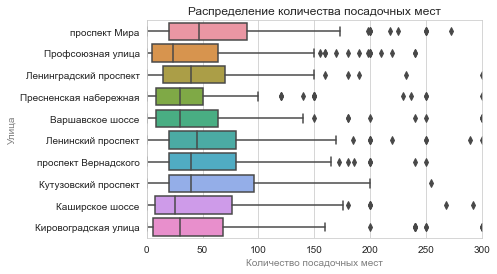

In [23]:
ax = sns.boxplot(y='street', x='number', data=top_ten_seats)
ax.set_title('Распределение количества посадочных мест')
ax.set_ylabel('Улица', color='grey')
ax.set_xlabel('Количество посадочных мест', color='grey')
plt.xlim(0,300)
plt.show()

Анализируя график "ящик с усами" можно заметить скошенность наборов данных в этой десятке - медиана чаще меньше среднего. Среднее "едет" в ту сторону, где есть дополнительные значения. Значит там есть выбросы, заведения с большим количеством посадочных мест на Каширском шоссе, Кутузовском проспекте, Профсоюзной улице и других

## Общий вывод по шагу 2

Исследовательский анализ показал следующее:

    - Среди объектов предприятий общественного питания наиболее часто встречается кафе, реже рестораны и предприятия быстрого обслуживания
    - Количество несетевых заведений в пять раз превышает количество сетевых
    - Принадлежность сети часто характерна ресторанам быстрого питания
    - По количеству посадочных мест в среднем лидируют столовые (130) и рестораны(100). Кафе в среднем имеют 50 посадочных мест
    - Улицы с наибольшим количеством заведений - те, что расположены рядом с транпортными узлами и вдоль транспортных путей,т.е. перемещения людей, их деловой активности, а также рядом с местами интереса - достопримечательностями, парками. 
    
Рекомендации:
- Предположу, что логичнее выбрать место, где можно организовать около 100 посадочных мест. Ресторанов в целом меньше, соответственно и конкуренция ниже. К тому же из-за довольно оригинальной специфики (роботы-официанты), нужна соответсвующая площадь. Для передвижений роботу нужна разметка, к примеру. В маленьком кафе идея может смотреться несоразмерно замыслу.
- По расположению: возможно, один из переулков, улочек рядом с основными магистралями. Аренда так или иначе будет высокая, расположение лучше выбрать выгодное. Располагаться вдали от людных мест для такого проекта, не думаю, что имеет смысл
- Конкуренция довольно высокая. Есть сетевые заведения с настроенной корпоративной политикой и отлаженным сервисом, есть рестораны быстрого питания, где скорость обслуживания высокая. Чтобы удержать посетителя, нужно что-то предложить помимо интересной особенности в обслуживании, возможно, оригинальное меню (Курица по-клингонски и тп) соответсвующее идее, также уютную обстановку.
    

# Презентация

Презентация подготавливается для инвесторов. Инвесторов, как правило, интересует окупаемость (сроки, проценты) вложенных средств. Так как потенциально они вместе учредителями бизнеса идут на риск, им нужно убедиться, что бизнес-план был подготовлен соответственно (бизнес-план содержит анализ рынка), что учредители верно оценили ситуацию и приняли решение. Концепция ресторана, как правило, живет три года. Даже если бизнес успешен, все равно нужно производить обновление бизнеса. Более точные расчеты, предполагаю, произведут маркетологи. Своей презентацией я постараюсь убедить, что мы с партнерами изучали рынок и подготовили отчет

Сама по себе идея заведения общественного питания с роботами не новая. Изучив внешние источники, можно сказать, что подобные заведения уже открылись по всему миру: к примеру в Китае есть ресторан с метной кухней, где робот развозит мясо и овощи, которые гости добавляют в свой бульон, на круизных лайнерах и не только есть кафе с поваром-роботом, который может приготовить пиццу или робот-бариста. В Москве сеть Шоколадница запускала роботов-официантов, а ресторан быстрого питания KFC запустил объект полностью автоматизированный: заказы и оплату принимают терминалы, а заказ на кухне собирает автоматизированная рука. Это было призвано в том числе, чтобы предложить пользователяи более гигиентичный сервис. Таким образом, для мира вообще и для Москвы в частности использование роботов в общепите не новость. Однако проект дорогой, один робот стоит тысячи долларов, а функионал имеет относительно слабый. Тем не менее одно только наличие их может привлечь посетителей и удерживать их, так как в настоящее время таких точек мало.

Презентация: <https://drive.google.com/file/d/1KrGUx-5hGkw1r8Jo7rhjAhfDSKFbYcNR/view?usp=sharing>